<a href="https://colab.research.google.com/github/AtharvaTijare/Artificial-Intelligence/blob/main/p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shortest path: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4)]


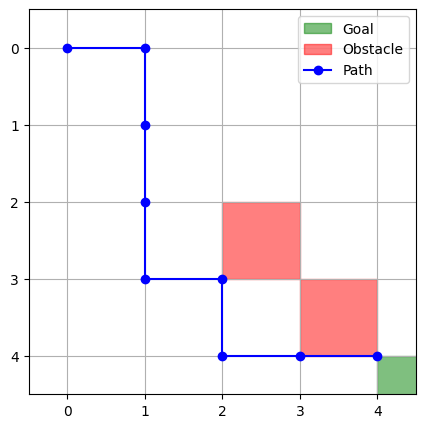

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the grid world
grid_size = (5, 5)
num_actions = 4  # Up, Down, Left, Right
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.1  # Exploration rate

goal_state = (4, 4)
obstacles = [(2, 2), (3, 3)]

def is_valid_state(state):
    return (0 <= state[0] < grid_size[0] and 0 <= state[1] < grid_size[1] and state not in obstacles)

def get_next_state(state, action):
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    next_state = (state[0] + moves[action][0], state[1] + moves[action][1])
    return state if not is_valid_state(next_state) else next_state

def get_reward(state):
    if state == goal_state:
        return 100  # Reward for reaching goal
    return -1  # Small penalty to encourage shortest path

# Initialize Q-table
Q = np.zeros(grid_size + (num_actions,))

# Q-learning algorithm
def q_learning(episodes=1000):
    for episode in range(episodes):
        state = (0, 0)  # Start position
        while state != goal_state:
            if random.uniform(0, 1) < epsilon:
                action = random.choice(range(num_actions))  # Explore
            else:
                action = np.argmax(Q[state])  # Exploit

            next_state = get_next_state(state, action)
            reward = get_reward(next_state)

            # Q-learning update rule
            Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
            state = next_state

q_learning()

# Display shortest path and plot it
def display_shortest_path():
    state = (0, 0)
    path = [state]
    while state != goal_state:
        action = np.argmax(Q[state])
        next_state = get_next_state(state, action)
        if next_state == state:  # Prevent infinite loops
            break
        path.append(next_state)
        state = next_state
    print("Shortest path:", path)

    # Plot the grid and path
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xticks(range(grid_size[1] + 1))
    ax.set_yticks(range(grid_size[0] + 1))
    ax.grid(True)
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.invert_yaxis()

    # Mark goal
    ax.add_patch(plt.Rectangle(goal_state[::-1], 1, 1, color='green', alpha=0.5, label='Goal'))

    # Mark obstacles
    for obs in obstacles:
        ax.add_patch(plt.Rectangle(obs[::-1], 1, 1, color='red', alpha=0.5, label='Obstacle' if obs == obstacles[0] else ""))

    # Plot the path
    x_vals, y_vals = zip(*path)
    ax.plot(y_vals, x_vals, marker='o', color='blue', label='Path')

    plt.legend()
    plt.show()

display_shortest_path()


In [ ]:
# Q-Learning algorithm:
# Q-Learning is a model-free reinforcement learning algorithm used to find the optimal
# action-selection policy for a given environment. It enables an agent to learn how to act
# optimally in a Markov Decision Process (MDP), even without knowing the environment's model.

# How It works:
# • Q-Learning learns a Q-value (quality) for each state-action pair.
# • The agent interacts with the environment, observes rewards and transitions, and updates
# the Q- values.
# • It uses the Bellman Equation to iteratively update Q-values.
# Q-value Formula:
# Q(s,a)←Q(s,a)+α[r+γa′maxQ(s′,a′)−Q(s,a)]
# Where:
# • s: current state
# • a: action taken
# • r: reward received
# • s': next state
# • α: learning rate (0 to 1)
# • γ: discount factor (importance of future rewards)

# Advantages:
# • Model-free: Does not require knowledge of the environment's transition probabilities.
# • Simple and easy to implement.
# • Converges to optimal policy with sufficient exploration and time.
# • Works well in discrete state-action spaces.
# • Supports off-policy learning, allowing flexibility in exploration strategies.
# Disadvantages:
# • Inefficient in large or continuous state spaces (needs large Q-tables).
# • Slow convergence in complex environments.
# • Requires good tuning of parameters (learning rate, discount factor, ε).
# • Doesn’t generalize — each state-action pair must be visited multiple times.
# • Struggles with non-stationary environments.

# Applications
# • Game AI (e.g., learning to play games like Tic-Tac-Toe, Grid World, Pac-Man)
# • Robotics (e.g., path planning, navigation, control)
# • Autonomous agents in simulations
# • Network routing and load balancing
# • Finance (e.g., stock trading bots)
# • Recommendation systems (learning user preferences)